In [1]:
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import random
from sklearn import datasets

%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 17

conn = sqlite3.connect(os.path.join(os.getcwd(),"works.db"))
result = pd.read_sql_query("select * from work;", conn)


In [2]:
result

,name,salary,url,company,address,skill,month
0,"iOS Developer (Swift, Objective-C)","$700 - $1,000",https://topdev.vn/detail-jobs/ios-developer-mo...,Monster Pixel,Ho Chi Minh,Swift,None
1,"KỸ SƯ PHẦN MỀM (Android, iOS, Java, .NET)","Up to $3,000",https://topdev.vn/detail-jobs/ky-su-phan-mem-t...,Tổng công ty viễn thông Viettel - Tập đoàn Côn...,Ha Noi,Android,None
2,"(HCM) Full-stack Team Leader (AngularJS, NodeJS)","$1,800 - $2,500",https://topdev.vn/detail-jobs/hcm-full-stack-t...,Kambria & OhmniLabs Vietnam,Ho Chi Minh,AngularJS,None
3,[HCM] Front-end JavaScript Developer (ReactJS)...,"$600 - $1,200",https://topdev.vn/detail-jobs/hcm-front-end-ja...,Công ty Wizy,Ho Chi Minh,JavaScript,None
4,"Full-Stack Developer (C#, .NET)","$1,000 - $2,000",https://topdev.vn/detail-jobs/full-stack-devel...,KONBINI,Ha Noi,C#,None
5,"iOS Developer (Swift, Mobile) | Competitive Sa...",Negotiable,https://topdev.vn/detail-jobs/ios-developer-co...,"Mytour Vietnam Co., LTD",Ha Noi,Swift,None
6,"Mobile Developer (Android, iOS)","$600 - $1,200",https://topdev.vn/detail-jobs/mobile-developer...,Công ty CP Mạng xã hội du lịch Hahalolo,Ho Chi Minh,Android,None
7,30 Kỹ Sư Lập Trình Java,"Up to $3,000",https://topdev.vn/detail-jobs/30-ky-su-lap-tri...,Tổng công ty viễn thông Viettel - Tập đoàn Côn...,Ha Noi,Java,None
8,(HN) 02 Android Developers (Java),"Up to $1,200",https://topdev.vn/detail-jobs/hn-02-android-de...,Adnet Plus,Ha Noi,Android,None
9,"(HCM) Full-stack Developer (PHP, HTML5, JavaSc...","$800 - $1,100",https://topdev.vn/detail-jobs/hcm-full-stack-d...,Công ty Cổ phần Yêu Thể Thao,Ho Chi Minh,PHP,None


In [3]:
result['salary']

0                   $700 - $1,000
1                    Up to $3,000
2                 $1,800 - $2,500
3                   $600 - $1,200
4                 $1,000 - $2,000
5                      Negotiable
6                   $600 - $1,200
7                    Up to $3,000
8                    Up to $1,200
9                   $800 - $1,100
10                     Negotiable
11                     Negotiable
12                     Negotiable
13                   Up to $1,000
14                   Up to $1,600
15      $15,000,000 - $25,000,000
16                $1,000 - $2,000
17                     Negotiable
18                     Negotiable
19                     Negotiable
20                     Negotiable
21                     Negotiable
22                     Negotiable
23                     Negotiable
24                     Negotiable
25                $1,000 - $2,000
26                     Negotiable
27                     Negotiable
28                     Negotiable
29            

In [6]:
salary = result['salary'].tolist()

result_salary = []
for i in salary:
    if i is None:
        i = 'Negotiable'
        result_salary.append(i)
    else:
        result_salary.append(i)

result['salary'] = result_salary

In [7]:
result['salary']

0                   $700 - $1,000
1                    Up to $3,000
2                 $1,800 - $2,500
3                   $600 - $1,200
4                 $1,000 - $2,000
5                      Negotiable
6                   $600 - $1,200
7                    Up to $3,000
8                    Up to $1,200
9                   $800 - $1,100
10                     Negotiable
11                     Negotiable
12                     Negotiable
13                   Up to $1,000
14                   Up to $1,600
15      $15,000,000 - $25,000,000
16                $1,000 - $2,000
17                     Negotiable
18                     Negotiable
19                     Negotiable
20                     Negotiable
21                     Negotiable
22                     Negotiable
23                     Negotiable
24                     Negotiable
25                $1,000 - $2,000
26                     Negotiable
27                     Negotiable
28                     Negotiable
29            

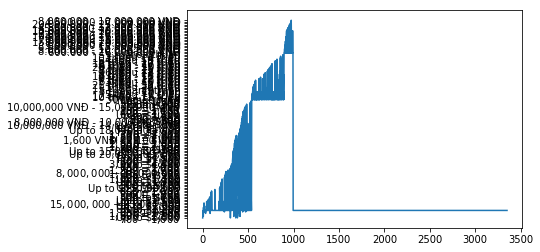

In [8]:
plt.plot(result['salary'])


### code để lấy ra lương có khoảng lương và lưu vào file coluong.csv

In [1]:


salary = result['salary'].tolist()
def to_csv_khongluong():
    result_salary = []
    for i in salary:
        if i is None:
            i = 'Negotiable'
            result_salary.append(i)
        else:
            result_salary.append(i)

    result['salary'] = result_salary
    result_three = result[result['salary'] != 'Negotiable'] 
    result_tl = result_three[result_three['salary'] != 'Thương lượng']
    result_ct = result_tl[result_tl['salary'] != 'Cạnh tranh']
    result_tt = result_ct[result_ct['salary'] != 'Thỏa thuận']
    result_tt.to_csv('coluong.csv')
    

NameError: name 'result' is not defined

### code lấy ra những job nào không có lương và lưu vào file khongluong.csv

In [2]:
def to_csv_coluong():
    p_negotiable = re.compile('Negotiable|Thương lượng|Cạnh tranh|Thỏa thuận')
    list_negotiable = []
    list_none = []
    for item in salary:
        if item is not None:
            x = p_negotiable.findall(item)
            if len(x) != 0:
                list_negotiable.append(item)
        else:
            list_none.append(item)

    result_negotiable = result[result['salary'] == 'Negotiable']
    result_tl = result[result['salary'] == 'Thương lượng']
    result_ct = result[result['salary'] == 'Cạnh tranh']
    result_tt = result[result['salary'] == 'Thỏa thuận']
    result_salary_two = pd.concat([result_negotiable, result_tl, result_tt,result_ct])
    result_salary_two.to_csv('khongluong.csv')



In [4]:
have_salary= pd.read_csv('coluong.csv')

In [5]:
no_salary = pd.read_csv('khongluong.csv')

In [259]:
have_salary

,Unnamed: 0,name,salary,url,company,address,skill,month,Unnamed: 8,Unnamed: 9
0,0,"iOS Developer (Swift, Objective-C)","$700 - $1,000",https://topdev.vn/detail-jobs/ios-developer-mo...,Monster Pixel,Ho Chi Minh,Swift,NaN,NaN,NaN
1,1,"KỸ SƯ PHẦN MỀM (Android, iOS, Java, .NET)","Up to $2,000 - $3,000",https://topdev.vn/detail-jobs/ky-su-phan-mem-t...,Tổng công ty viễn thông Viettel - Tập đoàn Côn...,Ha Noi,Android,NaN,NaN,NaN
2,2,"(HCM) Full-stack Team Leader (AngularJS, NodeJS)","$1,800 - $2,500",https://topdev.vn/detail-jobs/hcm-full-stack-t...,Kambria & OhmniLabs Vietnam,Ho Chi Minh,AngularJS,NaN,NaN,NaN
3,3,[HCM] Front-end JavaScript Developer (ReactJS)...,"$600 - $1,200",https://topdev.vn/detail-jobs/hcm-front-end-ja...,Công ty Wizy,Ho Chi Minh,JavaScript,NaN,NaN,NaN
4,4,"Full-Stack Developer (C#, .NET)","$1,000 - $2,000",https://topdev.vn/detail-jobs/full-stack-devel...,KONBINI,Ha Noi,C#,NaN,NaN,NaN
5,6,"Mobile Developer (Android, iOS)","$600 - $1,200",https://topdev.vn/detail-jobs/mobile-developer...,Công ty CP Mạng xã hội du lịch Hahalolo,Ho Chi Minh,Android,NaN,NaN,NaN
6,7,30 Kỹ Sư Lập Trình Java,"Up to $2,000 - $3,000",https://topdev.vn/detail-jobs/30-ky-su-lap-tri...,Tổng công ty viễn thông Viettel - Tập đoàn Côn...,Ha Noi,Java,NaN,NaN,NaN
7,8,(HN) 02 Android Developers (Java),"Up to $900 - $1,200",https://topdev.vn/detail-jobs/hn-02-android-de...,Adnet Plus,Ha Noi,Android,NaN,NaN,NaN
8,9,"(HCM) Full-stack Developer (PHP, HTML5, JavaSc...","$800 - $1,100",https://topdev.vn/detail-jobs/hcm-full-stack-d...,Công ty Cổ phần Yêu Thể Thao,Ho Chi Minh,PHP,NaN,NaN,NaN
9,13,(HN) 05 Java / PHP Developer,"Up to $900 - $1,000",https://topdev.vn/detail-jobs/hn-05-java-php-d...,MCredit,Ho Chi Minh,PHP,NaN,NaN,NaN


In [5]:
c = have_salary['salary'].tolist()

In [37]:
b = [i.split(' - ') for i in c]

In [38]:
b

[['$700', '$1,000'],
 ['Up to $3,000'],
 ['$1,800', '$2,500'],
 ['$600', '$1,200'],
 ['$1,000', '$2,000'],
 ['$600', '$1,200'],
 ['Up to $3,000'],
 ['Up to $1,200'],
 ['$800', '$1,100'],
 ['Up to $1,000'],
 ['Up to $1,600'],
 ['$15,000,000', '$25,000,000'],
 ['$1,000', '$2,000'],
 ['$1,000', '$2,000'],
 ['$600', '$1,200'],
 ['Up to $1,000'],
 ['Up to $1,500'],
 ['Up to $1,000'],
 ['Up to $1,500'],
 ['Up to $1,000'],
 ['Up to $1,500'],
 ['Up to $1,500'],
 ['Up to $2,000'],
 ['Up to $1,500'],
 ['Up to $1,500'],
 ['$800', '$1,500'],
 ['Up to $1,200'],
 ['Up to $750'],
 ['$600', '$1,200'],
 ['$500', '$1,000'],
 ['$500', '$1,200'],
 ['$600', '$900'],
 ['$800', '$1,500'],
 ['$550', '$1,000'],
 ['Up to $1,500'],
 ['$800', '$1,000'],
 ['Up to $1,500'],
 ['Up to $1,500'],
 ['Up to $1,500'],
 ['Up to $1,200'],
 ['Up to $1,000'],
 ['Up to $15,000,000'],
 ['$500', '$1,200'],
 ['Up to $1,000'],
 ['Up to $1,000'],
 ['Up to $2,500'],
 ['Up to $700'],
 ['$500', '$1,600'],
 ['Up to $1,000'],
 ['Up to $

In [61]:
p_d =  re.compile(r'\d+')
b = [i.split(' - ') for i in c]
print(b)
list_job_sal = []
for i, item in enumerate(b):
    if item is not None:
        x = p_d.findall(item)
        if len(x) > 1:
            h = ''
            for i in x:
                h += i
            list_job_sal.append(h)
        else:
            list_job_sal.append(x[0])
  
    

[['$700', '$1,000'], ['Up to $3,000'], ['$1,800', '$2,500'], ['$600', '$1,200'], ['$1,000', '$2,000'], ['$600', '$1,200'], ['Up to $3,000'], ['Up to $1,200'], ['$800', '$1,100'], ['Up to $1,000'], ['Up to $1,600'], ['$15,000,000', '$25,000,000'], ['$1,000', '$2,000'], ['$1,000', '$2,000'], ['$600', '$1,200'], ['Up to $1,000'], ['Up to $1,500'], ['Up to $1,000'], ['Up to $1,500'], ['Up to $1,000'], ['Up to $1,500'], ['Up to $1,500'], ['Up to $2,000'], ['Up to $1,500'], ['Up to $1,500'], ['$800', '$1,500'], ['Up to $1,200'], ['Up to $750'], ['$600', '$1,200'], ['$500', '$1,000'], ['$500', '$1,200'], ['$600', '$900'], ['$800', '$1,500'], ['$550', '$1,000'], ['Up to $1,500'], ['$800', '$1,000'], ['Up to $1,500'], ['Up to $1,500'], ['Up to $1,500'], ['Up to $1,200'], ['Up to $1,000'], ['Up to $15,000,000'], ['$500', '$1,200'], ['Up to $1,000'], ['Up to $1,000'], ['Up to $2,500'], ['Up to $700'], ['$500', '$1,600'], ['Up to $1,000'], ['Up to $1,700'], ['Up to $2,000'], ['Up to $1,500'], ['$6

TypeError: expected string or bytes-like object

#### Hàm lấy tiền lương có giá trị up to

In [6]:
def get_salary_up_to():
    p = re.compile('Up to|trở lên|From')
 
    p_d =  re.compile(r'\d+')
    list_salary_min, list_salary_max = [], []
    b = [i.split(' - ') for i in have_salary['salary'].tolist()]
    for i, item in enumerate(b):
        if len(item) == 2:
            y_one = p_d.findall(item[0])
            y_two = p_d.findall(item[1])
            if len(y_one) > 1:
                h = ''
                for j in y_one:
                    h += j
                list_salary_min.append((i,h))
            elif len(y_one) == 1:
                list_salary_min.append((i,y_one[0]))
                
            if len(y_two) > 1:
                
                h = ''
                for j in y_two:
                    h += j
                list_salary_max.append((i,h))
                
            elif len(y_two) == 1:
                list_salary_max.append((i,y_two[0]))
                
        elif len(item) == 1:
            
            y_one = p_d.findall(item[0])
            if len(y_one) > 1:
                h = ''
                for j in y_one:
                    h += j
                list_salary_max.append((i,h))
            else:
                list_salary_max.append((i,h))
                
            
    return list_salary_min, list_salary_max


In [7]:
list_salary_min, list_salary_max = get_salary_up_to()

#### hàm chuyển đổi tiền việt sang usd

In [9]:

def converse_VND_to_USD(coefficient, list_salary):
    salary_vnd_to_usd = []
    for i in list_salary:
        i = list(i)
        
        if len(i[1]) > 4:
            i[1] = int(i[1])*coefficient
            salary_vnd_to_usd.append((i[1]))
        elif len(i[1]) == 2 or len(i[1]) == 1:
            i[1] = int(i[1])*coefficient*1000000
            salary_vnd_to_usd.append((i[1]))
        else:
            salary_vnd_to_usd.append((int(i[1])))
    return salary_vnd_to_usd

In [10]:
salary_vnd_to_usd_min = converse_VND_to_USD(0.0000428678, list_salary_min)

In [24]:
salary_vnd_to_usd_min

[700,
 2000,
 1800,
 600,
 1000,
 600,
 2000,
 900,
 800,
 900,
 1000,
 643.017,
 1000,
 1000,
 600,
 900,
 1000,
 900,
 1000,
 900,
 1000,
 1000,
 1200,
 1100,
 1200,
 800,
 800,
 450,
 600,
 500,
 500,
 600,
 800,
 550,
 1300,
 800,
 950,
 1000,
 1100,
 900,
 800,
 385.8102,
 500,
 700,
 850,
 1000,
 400,
 500,
 800,
 1400,
 1300,
 1000,
 600,
 900,
 800,
 800,
 1000,
 1000,
 1000,
 800,
 800,
 800,
 500,
 1000,
 500,
 342.9424,
 1000,
 750,
 800,
 850,
 800,
 1000,
 1000,
 800,
 1000,
 1500,
 700,
 800,
 700,
 800,
 700,
 1000,
 650,
 500,
 900,
 500,
 700,
 700,
 1000,
 3000,
 600,
 700,
 1300,
 1000,
 1500,
 700,
 700,
 1000,
 900,
 950,
 300,
 2000,
 1200,
 1000,
 500,
 1100,
 800,
 1200,
 1800,
 2000,
 1100,
 1000,
 1500,
 1600,
 1000,
 800,
 700,
 1200,
 1300,
 600,
 500,
 1500,
 1200,
 1500,
 500,
 600,
 2000,
 800,
 1000,
 700,
 700,
 1500,
 700,
 1000,
 1000,
 800,
 1300,
 1000,
 800,
 600,
 600,
 1200,
 500,
 700,
 1000,
 1000,
 1500,
 1300,
 1000,
 900,
 700,
 900,
 1000,


In [26]:
f

NameError: name 'f' is not defined

In [22]:
salary_min_max

NameError: name 'salary_min_max' is not defined

In [11]:
df_salary_min_max = pd.DataFrame(salary_min_max)

NameError: name 'salary_min_max' is not defined

In [19]:
plt.plot(df_salary_min_max)

NameError: name 'df_salary_min_max' is not defined

In [10]:
salary_vnd_to_usd_max

[1000,
 3000,
 2500,
 1200,
 2000,
 1200,
 3000,
 1200,
 1100,
 1000,
 1600,
 1071.6950000000002,
 2000,
 2000,
 1200,
 1000,
 1500,
 1000,
 1500,
 1000,
 1500,
 1500,
 2000,
 1500,
 1500,
 1500,
 1200,
 750,
 1200,
 1000,
 1200,
 900,
 1500,
 1000,
 1500,
 1000,
 1500,
 1500,
 1500,
 1200,
 1000,
 643.017,
 1200,
 1000,
 1000,
 2500,
 700,
 1600,
 1000,
 1700,
 2000,
 1500,
 1000,
 1100,
 1200,
 1000,
 1500,
 2000,
 1300,
 1000,
 1200,
 1000,
 900,
 1500,
 1000,
 643.017,
 1500,
 1000,
 1000,
 1000,
 1700,
 1500,
 1500,
 1500,
 1500,
 3000,
 1000,
 1000,
 1000,
 1200,
 1800,
 1500,
 1000,
 1000,
 1400,
 1000,
 1000,
 1000,
 1500,
 4500,
 2000,
 1700,
 1500,
 1300,
 3000,
 42867800857.356,
 1200,
 1200,
 1500,
 1500,
 38581020643.017006,
 1500,
 600,
 3000,
 1700,
 1500,
 1000,
 2000,
 1300,
 1500,
 2000,
 2500,
 1700,
 1500,
 1800,
 2100,
 3000,
 1500,
 1000,
 2000,
 1500,
 1000,
 1000,
 2000,
 1700,
 2000,
 1000,
 1000,
 2500,
 1000,
 2000,
 1000,
 1000,
 3000,
 1200,
 2000,
 3000,
 

In [116]:
address_salary = have_salary['address'].tolist()

In [15]:
def getJobLocation():

    listJobLocation, countJobLocations = [], []
    job_locations = list(result['address'])
    listJobLocation, countJobLocations = [], []
    for job_location in job_locations:
        if type(job_location) is str:
            listJobLocation += job_location.split(', ')
        else:
            job_locations.remove(job_location)
    # 2 câu lệnh này có nghĩa chỉ lấy địa điểm không bị trùng vd như 'hà nội', 'hà nội' chỉ tính 'hà nội' trong list lịtobLocation
    p = re.compile('Ho Chi Minh')

    for i, item in enumerate(listJobLocation):
        if item == '':
            listJobLocation.remove(item)
        else:
            x = p.findall(item)
            if len(x) != 0:
                listJobLocation[i] = 'Ho Chi Minh'

    getListLocations = list(set([getListLocation for getListLocation in listJobLocation if listJobLocation.count(getListLocation) >=1 ]))
    getListLocations.sort(reverse = False) # sắp xếp theo thứ tự anpha bêta
    
    # Vòng for này để đếm số lượng xuất hiện của địa điểm
    for getListLocation in getListLocations:
    
        countJobLocation = listJobLocation.count(getListLocation)
        countJobLocations.append(countJobLocation)
        
    return getListLocations, countJobLocations

In [16]:

import re

def  language():
    list_skill = list(result['skill'])
    list_language, count_languages = [], []
    list_job_skill, count_job_it = [], []
    p = re.compile('[-/ ]|Khác')
    for skill in list_skill:
        if type(skill) is str:
         
            
            skill_search_one = p.findall(skill)
            if len(skill_search_one) == 0:
                list_language.append(skill)

            else:
                list_job_skill += skill.split(', ')
    
        else:
            list_skill.remove(skill)
                
    list_language = [i.lower() for i in list_language]
    p_game = re.compile('game')
    for i, item in enumerate(list_language):
        x = p_game.findall(item)
        if len(x) != 0:
            list_language[i] = 'game'
            

    get_languages = list(set([get_language for get_language in list_language if list_language.count(get_language) >=1 ]))
    get_languages.sort(reverse = False)

    
    for get_language in get_languages:
        count_language = list_language.count(get_language)
        count_languages.append(count_language)

    
    p_one = re.compile('ui')    
        
    list_job_skill = [i.lower() for i in list_job_skill]
    for i, item in enumerate(list_job_skill):
        x = p_one.findall(item)
        if len(x) != 0:
            list_job_skill[i] = 'ui design'
            
        
    get_list_job_skills = list(set([get_list_job_skill for get_list_job_skill in list_job_skill if list_job_skill.count(get_list_job_skill) >=1 ]))
    get_list_job_skills.sort(reverse = False)
    
    p_skill = re.compile('admin|viễn thông|ruby|design|react|web|manager|it|game|data|end|test|stack|business|an ninh mạng')
    list_job_it = []
    for i in get_list_job_skills:
        x = p_skill.findall(i)
        if len(x) != 0:
            list_job_it.append(i)
    
    for item in list_job_it:
        count_job_skill = list_job_skill.count(item)
        count_job_it.append(count_job_skill)
    
    return get_languages, list_job_it, count_languages, count_job_it
get_languages, list_job_it,  count_languages, count_job_it = language()

In [ ]:
nameJobLocation, countJobLocation = getJobLocation()

In [404]:
len(k)

65

In [397]:
len(t)

133

In [112]:
list(zip(nameJobLocation, range(0, len(nameJobLocation))))

[('Ba Ria - Vung Tau', 0),
 ('Bac Giang', 1),
 ('Bac Lieu', 2),
 ('Bac Ninh', 3),
 ('Binh Duong', 4),
 ('Ca Mau', 5),
 ('Can Tho', 6),
 ('Da Nang', 7),
 ('Dong Nai', 8),
 ('Ha Nam', 9),
 ('Ha Noi', 10),
 ('Hai Duong', 11),
 ('Hai Phong', 12),
 ('Ho Chi Minh', 13),
 ('Khanh Hoa', 14),
 ('Kien Giang', 15),
 ('Lam Dong', 16),
 ('Lang Son', 17),
 ('Long An', 18),
 ('Quang Ninh', 19),
 ('Tay Ninh', 20),
 ('Thai Nguyen', 21),
 ('Thanh Hoa', 22),
 ('Thua Thien Hue', 23)]

In [17]:
df = pd.DataFrame(nameJobLocation, np.arange(0, len(nameJobLocation)), columns=['addr'])

NameError: name 'nameJobLocation' is not defined

In [12]:
add_one = df['addr'].tolist()

NameError: name 'df' is not defined

In [11]:
k = add_one + ['Ben Tre', 'Binh Dinh', 'An Giang', 'Ha Tinh','Dien Bien', 'Dong Nai', 'Thai Binh','Thanh Hoa','Yen Bai','Binh Thuan','Cao Bang','Binh Phuoc','Gia Lai','Ha Giang', 'Son La', 'Lao Cai', 'Lai Chau', 'Dak Lak', 'Dak Nong', 'Dien Bien', 'Dong Nai', 'Dong Thap', 'Soc Trang', 'Quang Tri', 'Quang Binh', 'Quang Ngai', 'Hau Giang', 'Hoa Binh', 'Hung Yen', 'Yon Tom', 'Nam Dinh','Nghe An'
                   , 'Phu Yen', 'Tra Vinh', 'Phu Tho','Ninh Binh', 'Quang Nam', 'Vinh Long', 'Vinh Phuc', 'Lao Cai', 'Ninh Thuan']

NameError: name 'add_one' is not defined

In [407]:
df_add = pd.DataFrame(k ,columns=['addr'])

In [408]:
df_add

,addr
0,Ba Ria - Vung Tau
1,Bac Giang
2,Bac Lieu
3,Bac Ninh
4,Binh Duong
5,Ca Mau
6,Can Tho
7,Da Nang
8,Dong Nai
9,Ha Nam


In [411]:
df_add.iloc[13].tolist()[0]

'Ho Chi Minh'

In [150]:
address_salary[0]

'Ho Chi Minh'

In [163]:
address_salary

['Ho Chi Minh',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ha Noi',
 'Ho Chi Minh',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 

In [175]:
len(address_salary)

511

In [416]:
vector_adrr_, vector_skill = [], []

In [459]:
add_no_salary = no_salary['address'].tolist()

In [460]:
add_no_salary

['Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi

In [466]:

for i in address_salary:
    list_add = []
    x = i.split(', ')
    if len(x) == 1:
        for j in range(0, len(k)):
            if x[0] == df_add.iloc[j].tolist()[0]  :
                list_add.append(j)
            else:
                list_add.append(0)
        
    if len(x) == 3:
        for j in range(0, len(k)):
            if x[0] == df_add.iloc[j].tolist()[0]  or x[1] == df_add.iloc[j].tolist()[0]  or x[2] == df_add.iloc[j].tolist()[0]:
      
                list_add.append(j)
            else:
                list_add.append(0)
       
    if len(x) == 2:
        for j in range(0, len(k)):
            if x[0] == df_add.iloc[j].tolist()[0] or  x[1] == df_add.iloc[j].tolist()[0]:
      
                list_add.append(j)
            else:
                list_add.append(0)
       

    vector_adrr.append(list_add)
        
    
            
        

In [468]:
no_salary = pd.read_csv('khongluong.csv')

In [470]:
no_salary['address'].tolist()

['Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ho Chi Minh',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi',
 'Ha Noi

In [483]:
vector_add_test_ = []

In [484]:
for i in no_salary['address'].tolist():
    list_add = []
    for j in  range(0, len(k)):
        if i == df_add.iloc[j].tolist()[0]:
            list_add.append(j)
        else:
            list_add.append(0)
    vector_add_test_.append(list_add)

In [485]:
len(vector_add_test_)

2737

In [475]:
no_skill = no_salary['skill'].tolist()

In [476]:
no_skill = [ i.upper() for i in no_skill]

In [477]:
vector_skill_test = []

In [478]:
for i in no_skill:
    list_add = []
    for j in range(0, len(list_skill)):
        if i == df_skill.iloc[j].tolist()[0]:
            list_add.append(j)
        else:
            list_add.append(0)

    vector_skill_test.append(list_add)

In [479]:
vector_skill_test

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  37,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  32,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  15,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,

In [480]:
len(vector_skill_test)

2737

In [418]:
z = np.array(vector_adrr_)

In [438]:
len(salary_vnd_to_usd_max)

336

In [439]:
a = random.sample(range(400, 1800), 179)

In [502]:
salary_vnd_to_usd_min = salary_vnd_to_usd_min + a

In [450]:
salary_vnd_to_usd_max = salary_vnd_to_usd_max + random.sample(range(400, 3000), 175)

In [503]:
len(salary_vnd_to_usd_min)

511

In [506]:
len(vector_adrr_)

1096

### Model can luong min

In [317]:
from sklearn import datasets, linear_model
import numpy as np

In [486]:
regr_min = linear_model.LinearRegression()

In [505]:
regr_min.fit(vector_adrr_, vector_skill_, salary_vnd_to_usd_min)

ValueError: Found input variables with inconsistent numbers of samples: [1096, 511]

### Model luong max

In [444]:
regr_max = linear_model.LinearRegression()

In [452]:
regr_max.fit(vector_adrr_, vector_skill_, salary_vnd_to_usd_max)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [494]:
regr_max.predict(vector_add_test_)

array([[ 0.00000000e+00,  4.19893113e-08,  0.00000000e+00, ...,
        -3.14266854e-13,  0.00000000e+00,  2.93464966e-05],
       [ 0.00000000e+00,  4.19893113e-08,  0.00000000e+00, ...,
        -3.14266854e-13,  0.00000000e+00,  2.93464966e-05],
       [ 0.00000000e+00,  4.19893113e-08,  0.00000000e+00, ...,
        -3.14266854e-13,  0.00000000e+00,  2.93464966e-05],
       ...,
       [ 0.00000000e+00,  4.19893113e-08,  0.00000000e+00, ...,
        -3.14266854e-13,  0.00000000e+00,  2.93464966e-05],
       [ 0.00000000e+00,  2.25401513e-08,  0.00000000e+00, ...,
         5.14852790e-07,  0.00000000e+00,  5.44913221e+00],
       [ 0.00000000e+00,  2.25401513e-08,  0.00000000e+00, ...,
         5.14852790e-07,  0.00000000e+00,  5.44913221e+00]])

In [495]:
regr_max.predict(vector_skill_test)

array([[0.00000000e+00, 2.25401513e-08, 0.00000000e+00, ...,
        5.14852790e-07, 0.00000000e+00, 5.44913221e+00],
       [0.00000000e+00, 2.25401513e-08, 0.00000000e+00, ...,
        5.14852790e-07, 0.00000000e+00, 5.44913221e+00],
       [0.00000000e+00, 2.57348185e-09, 0.00000000e+00, ...,
        5.87822110e-08, 0.00000000e+00, 6.22145017e-01],
       ...,
       [0.00000000e+00, 2.25401513e-08, 0.00000000e+00, ...,
        5.14852790e-07, 0.00000000e+00, 5.44913221e+00],
       [0.00000000e+00, 2.25401513e-08, 0.00000000e+00, ...,
        5.14852790e-07, 0.00000000e+00, 5.44913221e+00],
       [0.00000000e+00, 2.25401513e-08, 0.00000000e+00, ...,
        5.14852790e-07, 0.00000000e+00, 5.44913221e+00]])

In [454]:
np.array([[3, 5]]).shape

(1, 2)

In [ ]:
h

In [12]:
from sklearn.model_selection import train_test_split
vector_adrr_, vector_skill_, salary_vnd_to_usd_max, y_test = train_test_split(X,y,test_size=0.24,random_state=21)
print("Shapes of train and test sets:", X_train.shape,X_test.shape)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(vector_adrr_, salary_vnd_to_usd_max)
y_pred = knn.predict(vector_skill_)

print("Predicted labels: ", y_pred[:])
print("Ground truth    : ", y_test[:])

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

print("15NN accuary score of the test set:", knn.score(vector_skill_,y_test))
print("15NN accuary score of the train set:", knn.score(vector_adrr_,salary_vnd_to_usd_max))

NameError: name 'X' is not defined

In [108]:
nameJobLocation

['Ba Ria - Vung Tau',
 'Bac Giang',
 'Bac Lieu',
 'Bac Ninh',
 'Binh Duong',
 'Ca Mau',
 'Can Tho',
 'Da Nang',
 'Dong Nai',
 'Ha Nam',
 'Ha Noi',
 'Hai Duong',
 'Hai Phong',
 'Ho Chi Minh',
 'Khanh Hoa',
 'Kien Giang',
 'Lam Dong',
 'Lang Son',
 'Long An',
 'Quang Ninh',
 'Tay Ninh',
 'Thai Nguyen',
 'Thanh Hoa',
 'Thua Thien Hue']

In [24]:
countJobLocation

[2, 1, 1, 1, 23, 1, 3, 25, 8, 2, 2728, 3, 6, 545, 1, 1, 2, 1, 6, 1, 2, 1, 2, 4]

In [25]:
tableLocation = pd.DataFrame({'Name Location': nameJobLocation, 'Count Location': countJobLocation})
table_location_small = tableLocation[tableLocation['Count Location'] >= 15]

In [26]:
table_location_small

,Count Location,Name Location
4,23,Binh Duong
7,25,Da Nang
10,2728,Ha Noi
13,545,Ho Chi Minh


Text(0.5,1,'Bieu do phan bo viec lam theo khu vuc tuyen dung')

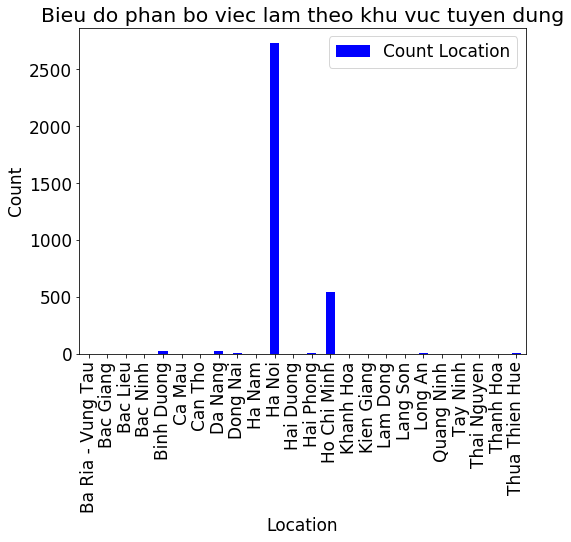

In [27]:
tableLocation.plot.bar(x = 'Name Location', color = 'blue')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Bieu do phan bo viec lam theo khu vuc tuyen dung')

In [5]:
table_location_small.plot.bar(x = 'Name Location', color = 'blue')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Bieu do phan bo viec lam theo khu vuc tuyen dung')

NameError: name 'table_location_small' is not defined

In [6]:
result['skill']

0              Swift
1            Android
2          AngularJS
3         JavaScript
4                 C#
5              Swift
6            Android
7               Java
8            Android
9                PHP
10                QA
11             HTML5
12             HTML5
13               PHP
14              Java
15               PHP
16               PHP
17               PHP
18      React Native
19           Android
20      React Native
21      React Native
22               iOS
23            NodeJS
24            Python
25               PHP
26              Java
27              Java
28              Java
29           Android
            ...     
3321         Laravel
3322         Laravel
3323         Laravel
3324         Laravel
3325         Laravel
3326         Laravel
3327         Laravel
3328         Laravel
3329         Laravel
3330         Laravel
3331         Laravel
3332         Laravel
3333         Laravel
3334         Laravel
3335         Laravel
3336         Laravel
3337         

In [233]:
list_job_it.append('thiết kế đồ họa - Web')

In [234]:
list_job_it

['an ninh mạng',
 'automation test',
 'back-end',
 'big data',
 'business analyst',
 'data analyst',
 'data analytics',
 'front-end',
 'full-stack',
 'game artist',
 'graphic design',
 'it phần cứng/mạng',
 'it phần mềm',
 'it/phần mềm/phần cứng',
 'product manager',
 'react native',
 'ruby on rails',
 'system admin',
 'thiết kế đồ họa - web',
 'ui design',
 'điện tử viễn thông',
 'điện tử/viễn thông',
 'thiết kế đồ họa - Web']

In [244]:
list_skill = get_languages + list_job_it
list_skill = [ i.upper() for i in list_skill]

In [245]:
list_skill

['.NET',
 'AGILE',
 'AI',
 'ANDROID',
 'ANGULARJS',
 'ASP.NET',
 'BLOCKCHAIN',
 'C#',
 'C++',
 'CLOUD',
 'CSS',
 'DEVOPS',
 'DJANGO',
 'GAME',
 'HTML',
 'HTML5',
 'IOS',
 'IOT',
 'J2EE',
 'JAVA',
 'JAVASCRIPT',
 'LARAVEL',
 'LINUX',
 'MACHINE',
 'MANAGER',
 'MOBILE',
 'MYSQL',
 'NODEJS',
 'OOP',
 'ORACLE',
 'PHP',
 'PYTHON',
 'QA',
 'QC',
 'REACTJS',
 'SECURITY',
 'SQL',
 'SWIFT',
 'TESTER',
 'UNITY',
 'VUEJS',
 'WORDPRESS',
 'AN NINH MẠNG',
 'AUTOMATION TEST',
 'BACK-END',
 'BIG DATA',
 'BUSINESS ANALYST',
 'DATA ANALYST',
 'DATA ANALYTICS',
 'FRONT-END',
 'FULL-STACK',
 'GAME ARTIST',
 'GRAPHIC DESIGN',
 'IT PHẦN CỨNG/MẠNG',
 'IT PHẦN MỀM',
 'IT/PHẦN MỀM/PHẦN CỨNG',
 'PRODUCT MANAGER',
 'REACT NATIVE',
 'RUBY ON RAILS',
 'SYSTEM ADMIN',
 'THIẾT KẾ ĐỒ HỌA - WEB',
 'UI DESIGN',
 'ĐIỆN TỬ VIỄN THÔNG',
 'ĐIỆN TỬ/VIỄN THÔNG',
 'THIẾT KẾ ĐỒ HỌA - WEB']

In [372]:
len(list_skill)

65

In [246]:
df_skill = pd.DataFrame(list_skill,columns=['skill'])

In [247]:
df_skill

,skill
0,.NET
1,AGILE
2,AI
3,ANDROID
4,ANGULARJS
5,ASP.NET
6,BLOCKCHAIN
7,C#
8,C++
9,CLOUD


In [229]:
skill_salary = have_salary['skill'].tolist()

In [248]:
skill_salary = [ i.upper() for i in skill_salary]

In [249]:
skill_salary

['SWIFT',
 'ANDROID',
 'ANGULARJS',
 'JAVASCRIPT',
 'C#',
 'ANDROID',
 'JAVA',
 'ANDROID',
 'PHP',
 'PHP',
 'JAVA',
 'PHP',
 'PHP',
 'PHP',
 'UNITY',
 'UNITY',
 'UNITY',
 'UNITY',
 'REACTJS',
 'NODEJS',
 'JAVASCRIPT',
 'JAVASCRIPT',
 'RUBY ON RAILS',
 'ANGULARJS',
 'PHP',
 'PHP',
 'PHP',
 'PHP',
 'HTML5',
 'PHP',
 'PHP',
 'PHP',
 'PHP',
 'PHP',
 'PHP',
 'CSS',
 'NODEJS',
 'IOS',
 'ASP.NET',
 'ASP.NET',
 'C#',
 'ASP.NET',
 'UNITY',
 'ASP.NET',
 'ORACLE',
 'ASP.NET',
 'JAVA',
 'PHP',
 'JAVA',
 'JAVA',
 'JAVA',
 'TESTER',
 'ASP.NET',
 'AGILE',
 'ASP.NET',
 'ASP.NET',
 'ASP.NET',
 'QA',
 'QA',
 'QC',
 'TESTER',
 'TESTER',
 'UX/UI DESIGN',
 'GRAPHIC DESIGN',
 'UX/UI DESIGN',
 'GRAPHIC DESIGN',
 'UX/UI DESIGN',
 'FRONT-END',
 'GRAPHIC DESIGN',
 'LINUX',
 'SYSTEM ADMIN',
 'C#',
 'AGILE',
 'ASP.NET',
 'ASP.NET',
 'UX/UI DESIGN',
 'UX/UI DESIGN',
 'ASP.NET',
 'C#',
 'PHP',
 'PHP',
 'PHP',
 'PHP',
 'PHP',
 'PHP',
 'PHP',
 'PHP',
 'PHP',
 'DEVOPS',
 'JAVASCRIPT',
 'OOP',
 'PHP',
 'FRONT-END',
 'A

In [366]:
vector_skill_ = []

In [367]:
for i in skill_salary:
    list_add = []
    for j in range(0, len(list_skill)):
        if i == df_skill.iloc[j].tolist()[0]:
            list_add.append(j)
        else:
            list_add.append(0)

    vector_skill_.append(list_add)

In [369]:
len(vector_skill_)

511

In [382]:
vector_adrr[0] = vector_adrr[0] + 41*a

In [384]:
np.array([vector_adrr[0], vector_skill_[0]]).dtype

dtype('int64')

In [380]:
a = [0]

In [381]:
41*a

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [33]:
data_it_job = pd.DataFrame({'name_it_job': list_job_it, 'count_skill_job': count_job_it})

In [34]:
data_it_job

,count_skill_job,name_it_job
0,71,an ninh mạng
1,2,automation test
2,50,back-end
3,2,big data
4,46,business analyst
5,14,data analyst
6,1,data analytics
7,140,front-end
8,34,full-stack
9,1,game artist


Text(0.5,1,'Bieu do phan bo it job theo nhom nganh')

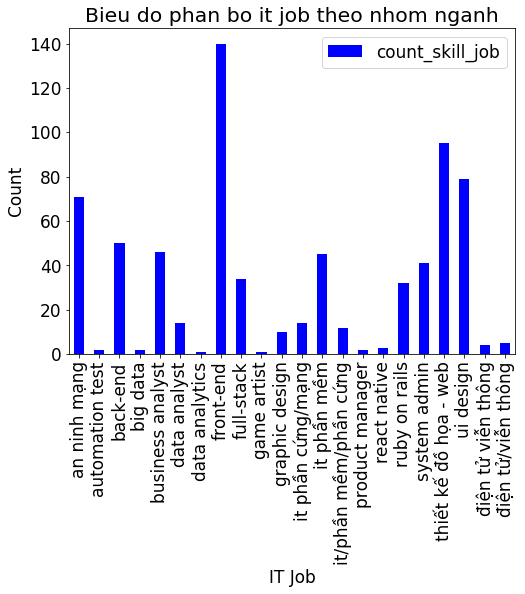

In [35]:
data_it_job.plot.bar(x = 'name_it_job', color = 'blue')
plt.xlabel('IT Job')
plt.ylabel('Count')
plt.title('Bieu do phan bo it job theo nhom nganh')


In [36]:
data_language = pd.DataFrame({'name_language': get_languages, 'count': count_languages})
data_language_small = data_language[data_language['count'] >= 10]

In [37]:
data_language

,count,name_language
0,136,.net
1,4,agile
2,75,ai
3,155,android
4,111,angularjs
5,24,asp.net
6,35,blockchain
7,51,c#
8,144,c++
9,70,cloud


In [38]:
data_language_small

,count,name_language
0,136,.net
2,75,ai
3,155,android
4,111,angularjs
5,24,asp.net
6,35,blockchain
7,51,c#
8,144,c++
9,70,cloud
10,17,css


/home/tuyet/.local/lib/python3.5/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0.5,1,'Bieu do phan bo theo ngon ngu')

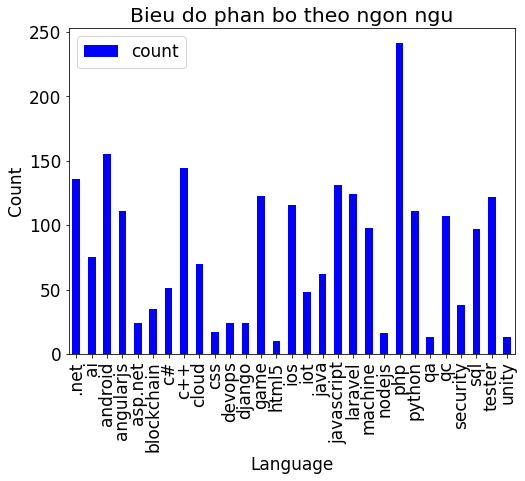

In [39]:
data_language_small.plot.bar(x = 'name_language', colors='b')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Bieu do phan bo theo ngon ngu')

local input: Binh Duong


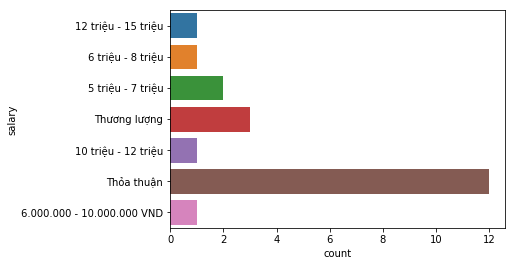

In [24]:
local = str(input('local input: '))
local_data = (result[result['address'] == local])
sns.countplot(y=local_data['salary'])

skill input: Python


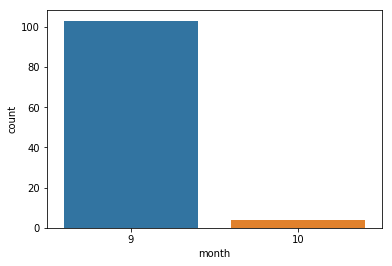

In [29]:
skill = str(input('skill input: '))
skill_data = (result[result['skill'] == skill])
sns.countplot(x=skill_data['month'])

skill input: AI


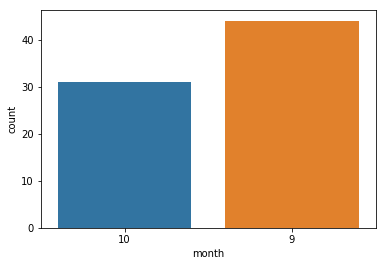

In [31]:
skill = str(input('skill input: '))
skill_data = (result[result['skill'] == skill])
sns.countplot(x=skill_data['month'])

month input: 8


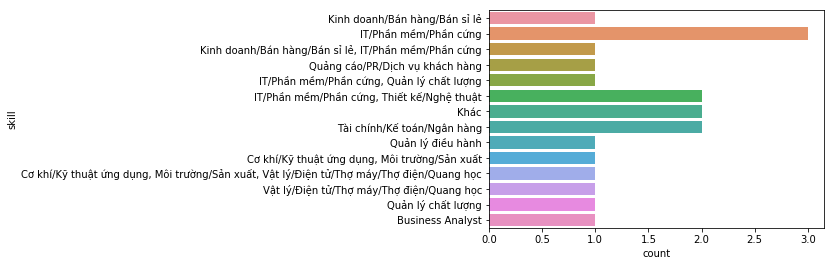

In [44]:
month = str(input('month input: '))
month_data = (result[result['month'] == month])
sns.countplot(y=month_data['skill'])